In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
from open3d.web_visualizer import draw
# Verify installation
import open3d as o3d; print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.
0.15.2


In [2]:
pcd = o3d.io.read_point_cloud("SavedPointcloud.pcd")
draw(pcd)


[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: {"stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"}
FEngine (64 bits) created at 0x7f4b50008800 (threading is enabled)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.


WebVisualizer(window_uid='window_0')

EGL(1.5)
OpenGL(4.1)
[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceServers
[Open3D INFO] [Called HTTP API (custom handshake)] /api/call
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: 

In [3]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("SavedPointcloud.pcd")
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])
print(pcd)

Load a ply point cloud, print it, and render it
PointCloud with 566705 points.


In [4]:
print("Downsample the point cloud with a voxel of 1")
downpcd = pcd.voxel_down_sample(voxel_size=100)
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])
print(downpcd)

Downsample the point cloud with a voxel of 1
PointCloud with 3571 points.


In [5]:
print("Recompute the normal of the downsampled point cloud")
downpcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=100, max_nn=30))
o3d.visualization.draw_geometries([downpcd],point_show_normal=True)

Recompute the normal of the downsampled point cloud


In [161]:
print("Every 5th points are selected")
uni_down_pcd = pcd.uniform_down_sample(every_k_points=5)
o3d.visualization.draw_geometries([uni_down_pcd])

Every 5th points are selected


In [6]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True)

    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud.paint_uniform_color([1, 0, 0])
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])


In [7]:
print("Statistical oulier removal")
clean_pcd, ind = downpcd.remove_statistical_outlier(nb_neighbors=200,
                                                        std_ratio=0.1)
display_inlier_outlier(downpcd, ind)

Statistical oulier removal
Showing outliers (red) and inliers (gray): 


In [163]:
o3d.visualization.draw_geometries([clean_pcd])

[3440:576][10216] (stun_port.cc:96): Binding request timed out from 172.16.128.x:50730 (enp0s31f6)


In [8]:
## DB Scan clustering
#Filtering
#outlier_cloud is the point cloud input
print("Load a ply point cloud, print it, and render it")
labels = np.array(clean_pcd.cluster_dbscan(eps=1200.0, min_points=100, print_progress=True))
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
clean_pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([clean_pcd])

Load a ply point cloud, print it, and render it
Precompute neighbors.[========point cloud has 7 clusters
Precompute neighbors.[========================================] 100%


[000:000][31092] (stun_port.cc:96): Binding request timed out from 172.16.128.x:47466 (enp0s31f6)


In [9]:
##Get cluster by DBScan
lidar_obj=[]
pcd_obj=[]
lens_cloud =[]
for i in range(max_label+1):
    obj = np.asarray(clean_pcd.points)[labels==i]
    lidar_obj.append(obj)
## Check the number of point inside each point cloud
for i in range(len(lidar_obj)):
    lens_cloud.append(len(lidar_obj[i]))
print("Print all the number of points in each cluster: \n",lens_cloud)
main_ith = max(lens_cloud)

## Find the largest number of point in the list point clouds
largest_points = lens_cloud.index(max(lens_cloud))
print("The order of largest point cluster is: ",largest_points)

Print all the number of points in each cluster: 
 [1712, 222, 177, 338, 149, 177, 177]
The order of largest point cluster is:  0


In [10]:
#get point cloud the object with label 0
pcd_obj_0 = o3d.geometry.PointCloud()
pcd_obj_0.points = o3d.utility.Vector3dVector(lidar_obj[largest_points])
o3d.visualization.draw_geometries([pcd_obj_0])

In [12]:
print(lidar_obj[largest_points])

[[   87.26       -4095.12       -2523.49      ]
 [ -156.91        4152.96       -2824.68      ]
 [  271.765      -6281.565      -2412.775     ]
 ...
 [ -526.76       -3357.54       -2563.48      ]
 [ -523.46574297  4462.5115261  -2242.46232932]
 [ -597.546       7356.43       -1925.904     ]]


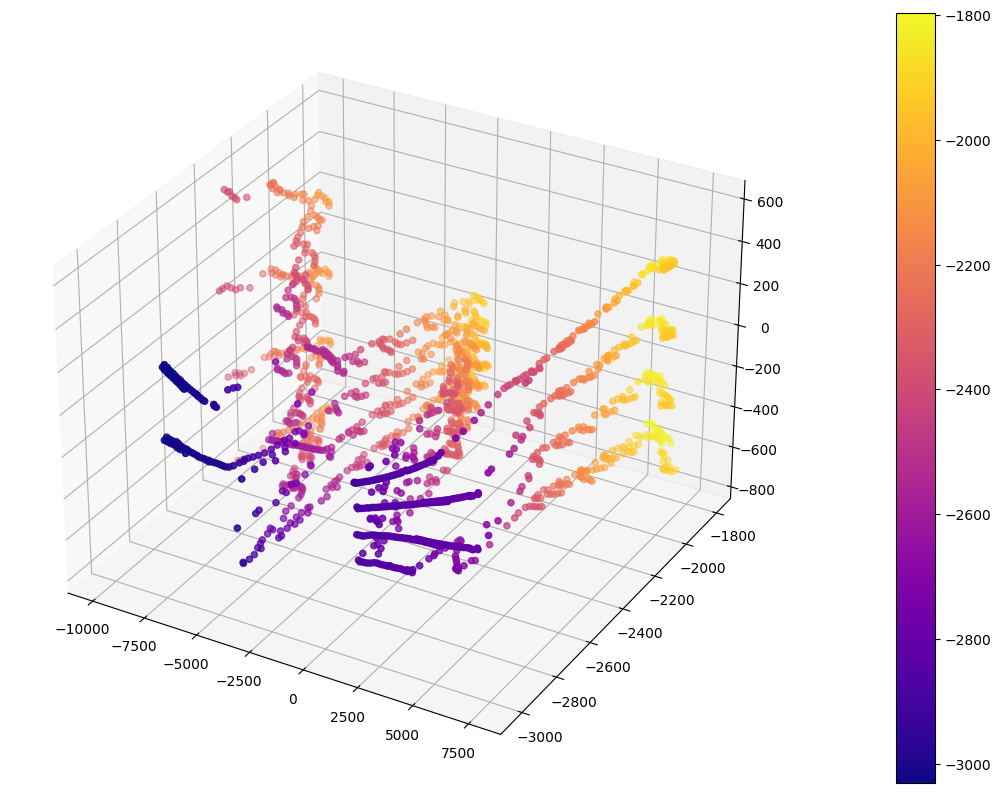

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

data = lidar_obj[largest_points]
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(y, z, x, c = z, cmap=plt.plasma())
fig.colorbar(img)
plt.show()

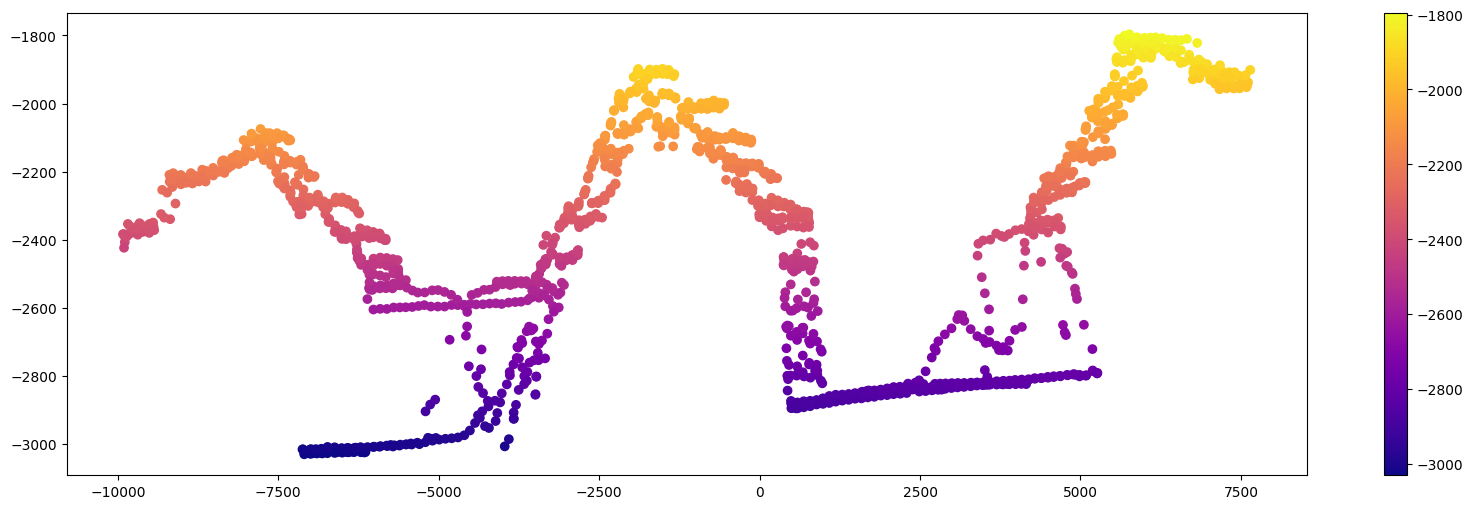

In [15]:
## Plot data on Y and Z Axis
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
img = ax.scatter(y, z, c = z, cmap=plt.plasma())
fig.colorbar(img)
plt.show()

# Plot Histogram 

## Covert to Mesh

In [88]:
## Convert to mesh
alpha = 500
print(f"alpha={alpha:.3f}")
mesh_obj = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd_obj_0, alpha)
mesh_obj.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_obj], mesh_show_back_face=True)

alpha=500.000


In [91]:
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh_obj)
# Create a scene and add the triangle mesh
scene = o3d.t.geometry.RaycastingScene()
_ = scene.add_triangles(mesh)

In [98]:
query_point = o3d.core.Tensor([[-1000, -7500, -2000]], dtype=o3d.core.Dtype.Float32)

# Compute distance of the query point from the surface
unsigned_distance = scene.compute_distance(query_point)
signed_distance = scene.compute_signed_distance(query_point)
occupancy = scene.compute_occupancy(query_point)

print("unsigned distance", unsigned_distance.numpy())
print("signed_distance", signed_distance.numpy())
print("occupancy", occupancy.numpy())




unsigned distance [391.92844]
signed_distance [391.92844]
occupancy [0.]


9920.28951219512
10000


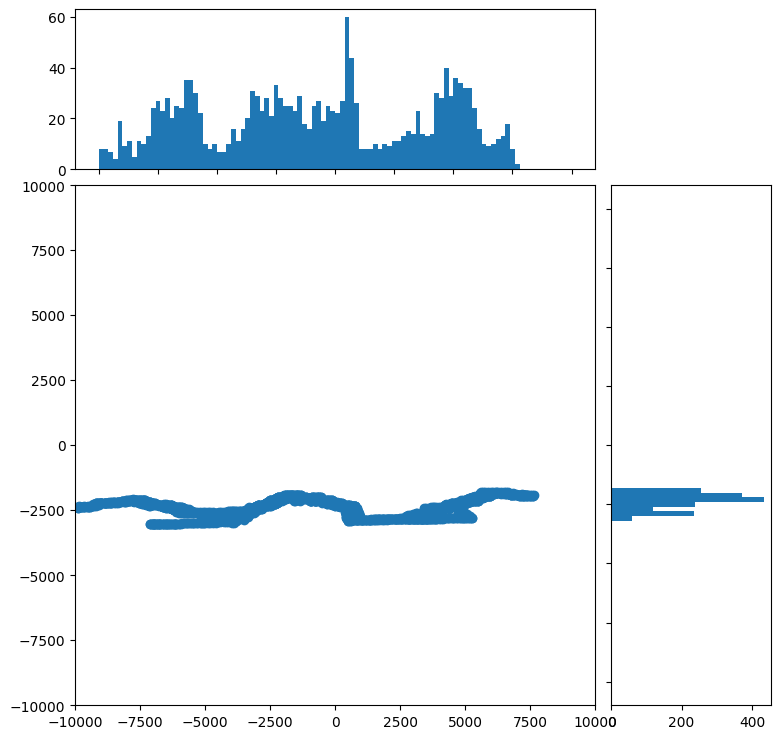

In [35]:
from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(y, z)


# now determine nice limits by hand:
binwidth = 200
zmax = np.max(z)
zmin = np.min(z)
yzmax = np.max([np.max(np.fabs(y)), np.max(np.fabs(z))])
print(yzmax)
lim = (int(yzmax/binwidth) + 1) * binwidth
print(lim)
axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))


bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(y, bins=bins)
axHisty.hist(z, bins=bins, orientation='horizontal')


plt.show()

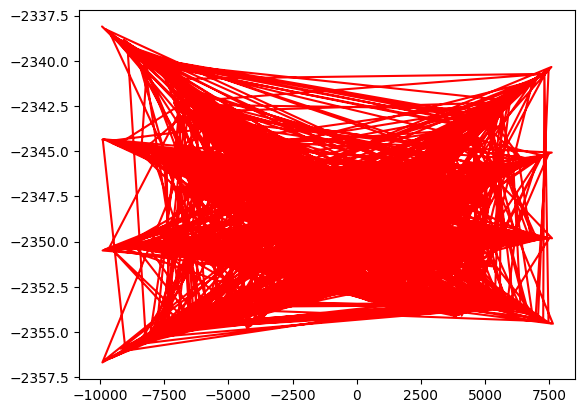